In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/angelali/Desktop/DS:ML/Kaggle projects/e-commerce retail/data.csv', encoding ='latin1')
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (541909, 8)


In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Check missing values

null values counts:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
null values ratio:
InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64


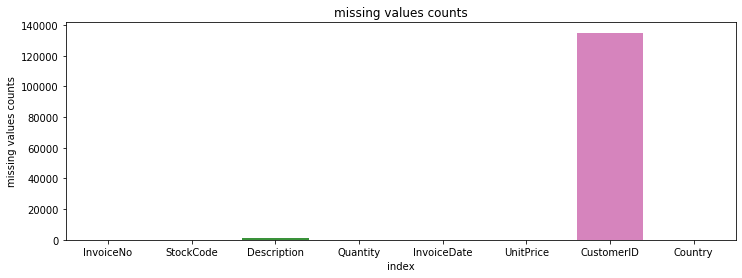

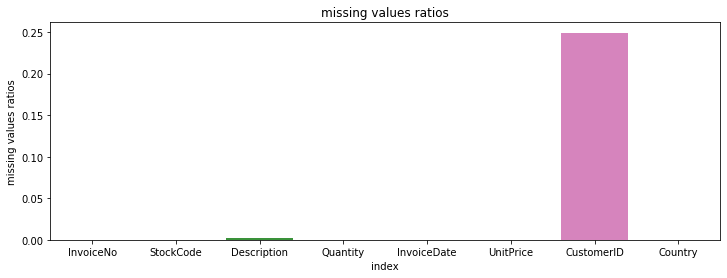

In [4]:
null_sum = df.isnull().sum()
print('null values counts:')
print(null_sum)

null_ratio = df.isnull().sum()/len(df)
print('null values ratio:')
print(null_ratio)

null_values = pd.concat([null_sum, null_ratio], axis=1).reset_index()

fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x=null_values['index'], y=null_values[0], ax=ax)
plt.title("missing values counts")
plt.ylabel("missing values counts")
plt.show()

fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x=null_values['index'], y=null_values[1], ax=ax)
plt.title("missing values ratios")
plt.ylabel("missing values ratios")
plt.show()



In [5]:
nan_rows = df[df['CustomerID'].isnull()]
nan_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [6]:
nan_rows[nan_rows['InvoiceNo']== '536544']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom


In [7]:
print('number of null values for InvoiceNo 536544 is:', nan_rows[nan_rows['InvoiceNo']== '536544'].CustomerID.isnull().sum())

print('number of rows for InvoiceNo 536544 is:', len(nan_rows[nan_rows['InvoiceNo']== '536544'].CustomerID))

number of null values for InvoiceNo 536544 is: 527
number of rows for InvoiceNo 536544 is: 527


In [8]:
# we can't replace the missing values for 'CustomerID' from 'InvoiceNo', so we drop the NaN values from df

df.dropna(subset=["CustomerID"], inplace=True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (406829, 8)


In [9]:
print('there are {} duplicated row'.format(df.duplicated().sum()))

#drop duplicated rows
df.drop_duplicates(inplace = True)

print('Dataframe dimensions:', df.shape)

there are 5225 duplicated row
Dataframe dimensions: (401604, 8)


# Exploratory Data Analysis

# explore 'country' 

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
print('there are {} unique countries'.format(df.Country.nunique()))

country = df.groupby(['Country'])['CustomerID'].aggregate('count')\
                                     .reset_index().sort_values('CustomerID', ascending=False)\
                                     .rename(columns={'CustomerID':'Total_Numbers'})

print(country)

there are 37 unique countries
                 Country  Total_Numbers
35        United Kingdom         356728
14               Germany           9480
13                France           8475
10                  EIRE           7475
30                 Spain           2528
23           Netherlands           2371
3                Belgium           2069
32           Switzerland           1877
26              Portugal           1471
0              Australia           1258
24                Norway           1086
18                 Italy            803
6        Channel Islands            757
12               Finland            695
7                 Cyprus            611
31                Sweden            461
1                Austria            401
9                Denmark            389
19                 Japan            358
25                Poland            341
33                   USA            291
17                Israel            247
36           Unspecified            241
29        

The 10 most polular countries

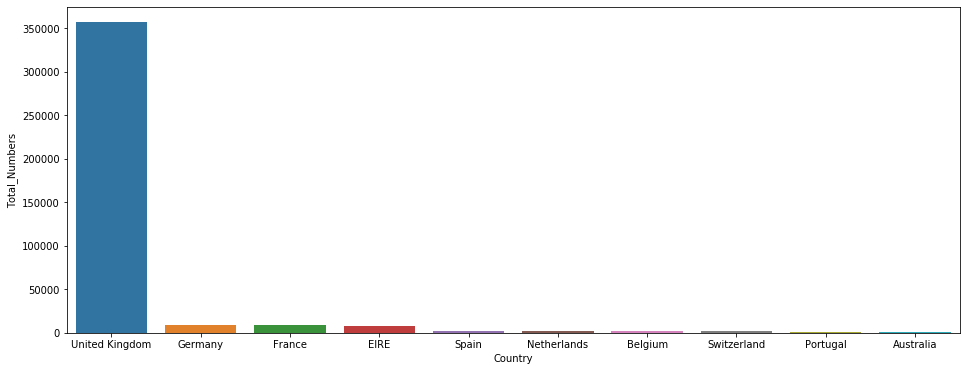

In [114]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x=country[:10]['Country'], y=country[:10]['Total_Numbers'], ax=ax)
plt.show()

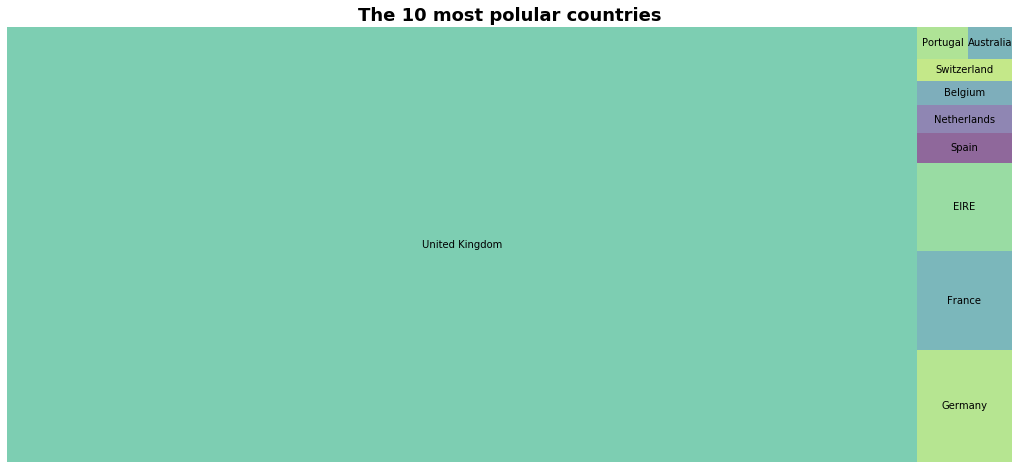

In [104]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(18, 8)

squarify.plot(sizes=country[:10]['Total_Numbers'], 
              label=country[:10]['Country'].values,
              alpha=.6 )

plt.title('The 10 most polular countries',fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# label enconder this categorical data 'country'

In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Country'])

LabelEncoder()

In [15]:
print(le.classes_)
print(len(le.classes_))

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brazil' 'Canada'
 'Channel Islands' 'Cyprus' 'Czech Republic' 'Denmark' 'EIRE'
 'European Community' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'Israel' 'Italy' 'Japan' 'Lebanon' 'Lithuania' 'Malta' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'RSA' 'Saudi Arabia' 'Singapore' 'Spain'
 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates' 'United Kingdom'
 'Unspecified']
37


In [16]:
k = [i for i in range(37)]
dict(zip(list(le.classes_), k))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [17]:
#creat a new coolumn for Country encoder
df['Country_encoder'] = le.transform(df['Country'])

In [18]:
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_encoder
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,35
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,35
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,35
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,35
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,35
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,35
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,35


# Explore 'StockCode' to find out more insights for products

In [19]:
# check how many purchses on each product
print(df['StockCode'].value_counts())

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
20727     1099
22383     1083
21212     1062
23298     1033
23209     1031
22086     1013
22382     1006
20728     1000
22469      990
22457      989
22960      966
22384      961
22727      917
21034      900
82482      900
22386      897
23206      890
22993      890
22138      885
22961      883
          ... 
44242A       1
90197B       1
90039A       1
35610A       1
37379A       1
85023C       1
84016        1
22218        1
90036F       1
90165B       1
90176C       1
85098B       1
20964        1
90039C       1
20678        1
90187B       1
22145        1
35610B       1
85068        1
90038C       1
90214Z       1
90038B       1
90131        1
90037B       1
84201C       1
16161M       1
47016        1
90183C       1
84743C       1
90024C       1
Name: StockCode, Length: 3684, dtype: int64


In [20]:
StockCode_count = df['StockCode'].value_counts()
print('number of unique products/stockcodes:', len(StockCode_count))


# percetage of the number of products been purchased more than 20 times/ total number of products
print('percentage of the products been purchased more than 20 times : {}%'\
      .format(round(StockCode_count[StockCode_count > 20].sum()/StockCode_count.sum()*100, 3))
       )


number of unique products/stockcodes: 3684
percentage of the products been purchased more than 20 times : 97.773%


# Dealing with outliners of proucts which are purchased less than 20 times

In [21]:
''' filter the 'StockCode' column from 'StockCode_count' dataframe
    and keep the ones that have been purchased more than new0 times'''

StockCode_count_new = StockCode_count[StockCode_count > 20]

df_new = df[df['StockCode'].isin(StockCode_count_new.index)]

print('the new dataframe has {} data points'.format(len(df_new)))
print()
print(df_new['StockCode'].value_counts())

the new dataframe has 392661 data points

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
20727     1099
22383     1083
21212     1062
23298     1033
23209     1031
22086     1013
22382     1006
20728     1000
22469      990
22457      989
22960      966
22384      961
22727      917
21034      900
82482      900
22386      897
23206      890
22993      890
22138      885
22666      883
          ... 
20830       21
21808       21
10080       21
23580       21
85180B      21
84600       21
35004G      21
37479P      21
22127       21
21289       21
21841       21
85127       21
85169C      21
22214       21
21129       21
22033       21
23522       21
79164       21
23149       21
23544       21
20781       21
72799F      21
84563B      21
21426       21
85093       21
84859C      21
23537       21
71406C      21
23459       21
22541       21
Name: StockCode, Length: 2491, dtype: int64

In [22]:
df_new.describe()

,Quantity,UnitPrice,CustomerID,Country_encoder
count,392661.00000,392661.000000,392661.000000,392661.000000
mean,12.25506,3.414012,15278.160816,32.793178
std,174.87042,70.198799,1714.189493,6.785542
min,-74215.00000,0.000000,12346.000000,0.000000
25%,2.00000,1.250000,13924.000000,35.000000
50%,5.00000,1.950000,15144.000000,35.000000
75%,12.00000,3.750000,16779.000000,35.000000
max,74215.00000,38970.000000,18287.000000,36.000000


as we can see above table, the minimum unitprice is 0, lets check that out

In [23]:
df_new[df_new['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_encoder
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,35
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,10
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,35
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,35
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom,35
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom,35
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom,35
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom,35
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom,35


In [24]:
print('there are {} invoices that has unitprice is 0'.format(len(df_new[df_new['UnitPrice']==0])))

there are 39 invoices that has unitprice is 0


In [25]:
# remove the all invoices that has unitprice is 0 
df_new = df_new[df_new['UnitPrice']!=0]

print(len(df_new))

392622


# Explore 'InvoiceNo' to find insights for customers' transactions 

In [26]:
df_new['InvoiceNo'].value_counts()

576339     526
579196     521
580727     512
578270     432
573576     425
567656     409
567183     389
575607     367
571441     348
572552     345
570488     343
568346     320
569246     278
547063     274
570672     257
554098     255
562031     253
543040     234
562046     219
569897     215
566290     207
574328     205
578233     202
556484     195
571653     193
579470     192
577504     188
561894     186
580956     181
560504     178
          ... 
575579       1
C575962      1
C559568      1
545448       1
555561       1
561672       1
C538098      1
545694       1
C558884      1
C571220      1
566184       1
C547802      1
561637       1
546329       1
C574019      1
C538632      1
C557879      1
567895       1
558925       1
C569958      1
C547236      1
C554331      1
C554004      1
575208       1
C559744      1
C562206      1
C539260      1
C551510      1
C569113      1
C572916      1
Name: InvoiceNo, Length: 22020, dtype: int64

In [27]:
print('there were {} unique transactions'.format(len(df_new['InvoiceNo'].value_counts())))

customer_transaction = df_new['InvoiceNo'].value_counts().values

transa_frequency = [5,10,20,50,100,200,500, len(customer_transaction)]

num_transaction = []

for i in transa_frequency:
    num_transaction.append(len(customer_transaction[customer_transaction<=i]))


interval = np.array( [str(transa_frequency[i])+'-'+str(transa_frequency[i+1]) for i in np.arange(len(transa_frequency)-1)]  )
interval_new = ['0-5']
interval_new.extend(interval)

print('transaction frequency interval: ',interval_new)
print('number of customers withtin each interval: ', num_transaction)

there were 22020 unique transactions
transaction frequency interval:  ['0-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500-22020']
number of customers withtin each interval:  [7363, 10447, 15438, 20520, 21806, 21997, 22017, 22020]


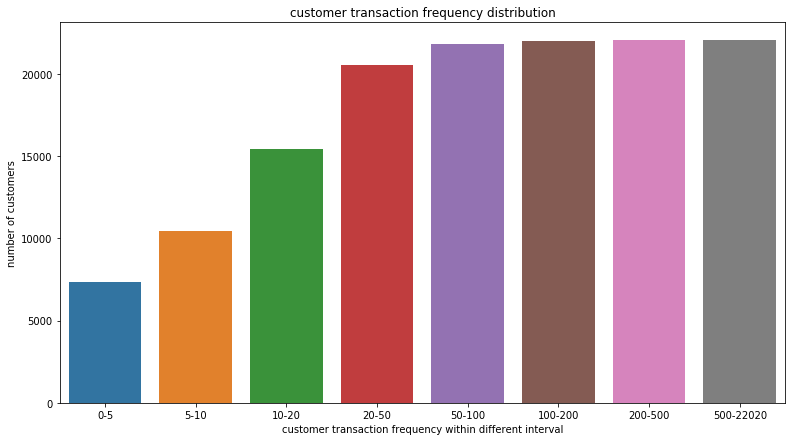

In [28]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(x=interval_new, y=num_transaction, ax=ax)
plt.title("customer transaction frequency distribution")
plt.xlabel("customer transaction frequency within different interval")
plt.ylabel("number of customers")
plt.show()

# Explore canceled orders

In [29]:
print('as we noticed that from dataframe description table, the minmum quanity is :', df_new['Quantity'].min())

as we noticed that from dataframe description table, the minmum quanity is : -74215


and these negavitve quantities means canceled orders

In [30]:
df_new[df_new['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_encoder
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,35
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,35
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,35
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,35
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,35
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,35
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom,35
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,35
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom,35
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom,35


In [31]:
print('there are {} canceled orders'.format(len(df_new[df_new['Quantity']<0])))

print('the percentage of canceled orders over all the orders is {}%'\
      .format(round(len(df_new[df_new['Quantity']<0]) / len(df_new)*100,3)))

there are 8578 canceled orders
the percentage of canceled orders over all the orders is 2.185%


# Check discount products

In [32]:
df_new[df_new['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_encoder
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,35
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom,35
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom,35
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom,35
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom,35
31135,C538897,D,Discount,-1,12/15/2010 9:14,42.50,16422.0,United Kingdom,35
31663,C539003,D,Discount,-1,12/15/2010 12:35,26.93,14527.0,United Kingdom,35
38609,C539589,D,Discount,-1,12/20/2010 13:14,13.88,14527.0,United Kingdom,35
44405,C540171,D,Discount,-1,1/5/2011 12:26,22.97,14527.0,United Kingdom,35
88032,C543752,D,Discount,-1,2/11/2011 14:12,64.27,14031.0,United Kingdom,35


In [33]:
print('the percentage of discount orders over all the orders is {}%'.
      format(round(len(df_new[df_new['StockCode'] == 'D'])/len(df_new)*100,5)))

the percentage of discount orders over all the orders is 0.01961%


since it has only 0.01961% discount orders, so we can remove them

In [34]:
df_new = df_new[df_new['StockCode'] != 'D']

# Apply RFM principles

In [35]:
# add a new column, the total value of each transaction
df_new['total_value'] = df_new['Quantity'] * df_new['UnitPrice']

# transform the 'InvoiceDate' datatype from object to datatime
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

# take the last invoice date + 1day as the date_snapshot
from datetime import timedelta
print('the last invoice date is :', df_new['InvoiceDate'].max())

date_snapshot = df_new['InvoiceDate'].max() + timedelta(days=1)
print('the date snapshot is :', date_snapshot)

the last invoice date is : 2011-12-09 12:50:00
the date snapshot is : 2011-12-10 12:50:00


In [36]:
RFM_df = df_new.groupby(['CustomerID']).agg({'InvoiceNo': 'count', 
                                             'total_value': 'sum', 
                                             'InvoiceDate': lambda x: (date_snapshot - x.max()).days})\
                                       .reset_index()

In [37]:
# round the total value to 2 decimal values 

RFM_df['total_value'] = round(RFM_df['total_value'], 2)

In [38]:
# rename the columns
RFM_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'total_value': 'MonetaryValue'}, inplace=True)

In [39]:
RFM_df.head()

,CustomerID,Frequency,MonetaryValue,Recency
0,12346.0,2,0.00,326
1,12347.0,177,4136.96,2
2,12348.0,31,1797.24,75
3,12349.0,73,1757.55,19
4,12350.0,16,316.70,310


In [40]:
print('there were {} unique customers'.format(len(RFM_df)))

there were 4362 unique customers


# look at the RFM features distributions

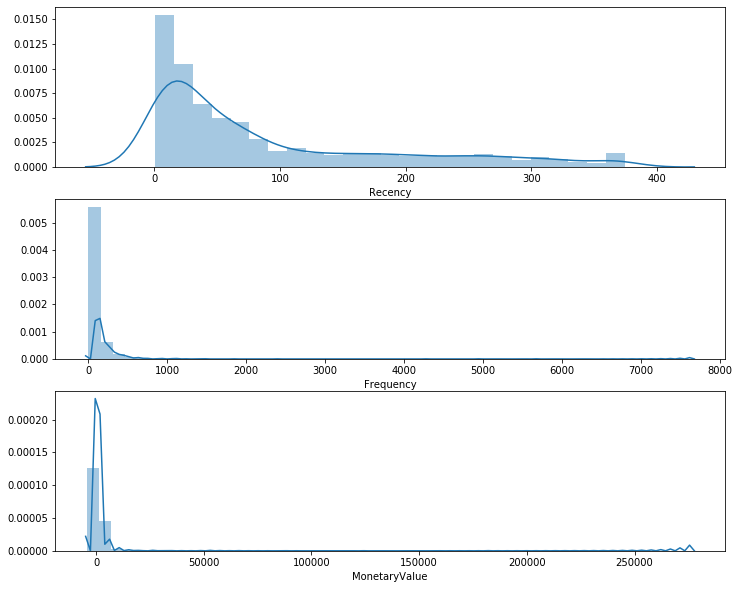

In [105]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
#Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM_df['MonetaryValue'])
# Show the plot
plt.show()

import warnings
warnings.filterwarnings('ignore')

# Assign RFM socres to the RFM features 

In [42]:
# use the .qcut() method to assign the relative percentile to their RFM features

Recency_qua = pd.qcut(RFM_df['Recency'],  [0, .25, .5, .75, 1.], labels=np.arange(4, 0, -1))
Frequency_qua = pd.qcut(RFM_df['Frequency'],  [0, .25, .5, .75, 1.], labels=np.arange(1,5))
MonetaryValue_qua = pd.qcut(RFM_df['MonetaryValue'],  [0, .25, .5, .75, 1.], labels=np.arange(1,5))

# adding new columns Recency_qua,Frequency_qua, MonetaryValue_qua
RFM_df = RFM_df.assign(Recency_qua = Recency_qua.values, 
                       Frequency_qua = Frequency_qua.values,
                       MonetaryValue_qua = MonetaryValue_qua.values
                       )
RFM_df.head()

,CustomerID,Frequency,MonetaryValue,Recency,Recency_qua,Frequency_qua,MonetaryValue_qua
0,12346.0,2,0.00,326,1,1,1
1,12347.0,177,4136.96,2,4,4,4
2,12348.0,31,1797.24,75,2,2,4
3,12349.0,73,1757.55,19,3,3,4
4,12350.0,16,316.70,310,1,1,2


In [43]:
# create 'RFM_score'

RFM_df['RFM_score'] = RFM_df.apply(lambda x: str(x['Recency_qua']) + \
                                   str(x['Frequency_qua']) + \
                                   str(x['MonetaryValue_qua']),\
                                   axis=1
                                  ) 

RFM_df.head()

,CustomerID,Frequency,MonetaryValue,Recency,Recency_qua,Frequency_qua,MonetaryValue_qua,RFM_score
0,12346.0,2,0.00,326,1,1,1,111
1,12347.0,177,4136.96,2,4,4,4,444
2,12348.0,31,1797.24,75,2,2,4,224
3,12349.0,73,1757.55,19,3,3,4,334
4,12350.0,16,316.70,310,1,1,2,112


# Customer Segmentation

In [44]:
# Define rfm_segment function
def rfm_segment(x):
    if x == '444':
        return 'best Customers: most recent,frequent, spending'
    
    elif x== '111':
        return 'worst customers'
    
    elif (x[0]=='4') & (x!= '444'):
        return 'most recent customers'
    
    elif (x[1]=='4') & (x!= '444'):
        return 'most frequent customers'    
    
    elif (x[2]=='4') & (x!= '444'):
        return 'most spending customers'
    
    elif x== '144':
        return 'lost most valuable customers'   
    
    elif x== '244':
        return 'almost lost most valuable customers'  
    
    else:
        return 'average customer'
    
# create new column 'RFM_segment' to 'RFM_df' table
RFM_df['RFM_segment'] = RFM_df['RFM_score'].apply(rfm_segment)

RFM_df.head()

,CustomerID,Frequency,MonetaryValue,Recency,Recency_qua,Frequency_qua,MonetaryValue_qua,RFM_score,RFM_segment
0,12346.0,2,0.00,326,1,1,1,111,worst customers
1,12347.0,177,4136.96,2,4,4,4,444,"best Customers: most recent,frequent, spending"
2,12348.0,31,1797.24,75,2,2,4,224,most spending customers
3,12349.0,73,1757.55,19,3,3,4,334,most spending customers
4,12350.0,16,316.70,310,1,1,2,112,average customer


In [107]:
# Calculate average values for each customer segment

segment_insight = RFM_df.groupby('RFM_segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).round(1).reset_index()


#calculate the size of each customer segment
customer_group_size = RFM_df['RFM_segment'].value_counts()/RFM_df['RFM_segment'].count()
customer_group_size = pd.DataFrame(customer_group_size.reset_index())

# add the column 'customer_group_size' to segment_insight table
segment_insight = segment_insight.merge(customer_group_size, how= 'inner',left_on='RFM_segment', right_on='index')
segment_insight.drop(['index'], axis= 1, inplace=True)


#rename segment_insight table
segment_insight.rename(columns={'RFM_segment_x':'RFM_segment', 
                                'Recency':'Recency_mean',
                                'Frequency':'Frequency_mean',
                                'MonetaryValue':'MonetaryValue_mean',
                                'RFM_segment_y':'customer_group_size'
                               }, inplace=True)

segment_insight

,RFM_segment,Recency_mean,Frequency_mean,MonetaryValue_mean,customer_group_size
0,average customer,112.5,33.1,522.6,0.485557
1,"best Customers: most recent,frequent, spending",6.7,361.8,8760.6,0.106832
2,most frequent customers,59.7,187.3,3050.7,0.119441
3,most recent customers,8.4,64.3,1219.0,0.151536
4,most spending customers,82.4,55.7,2769.2,0.043099
5,worst customers,263.6,7.9,108.9,0.093535


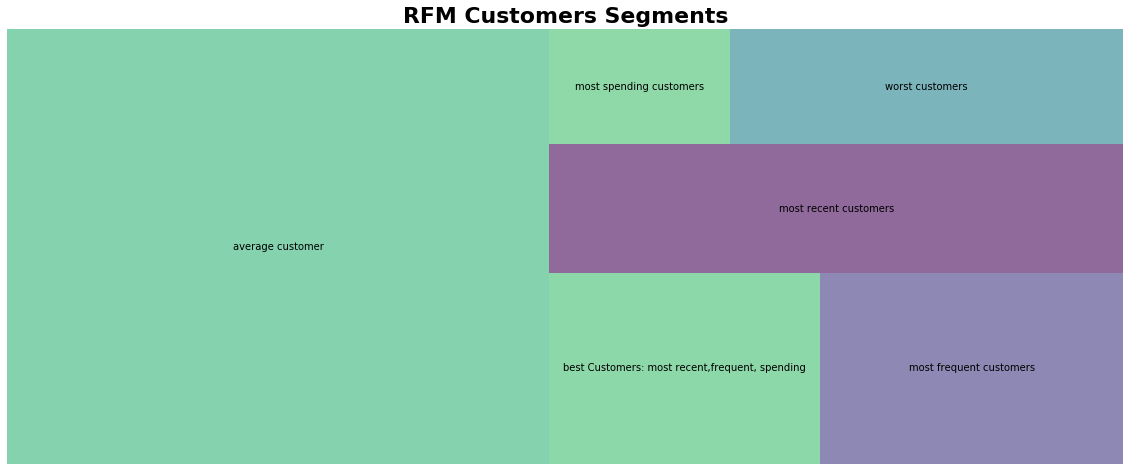

In [117]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 8)

squarify.plot(sizes=segment_insight['customer_group_size'], 
              label=segment_insight['RFM_segment'].values,
              alpha=.6 )

plt.title("RFM Customers Segments",fontsize=22,fontweight="bold")
plt.axis('off')
plt.show()

# Create RFMT Table for clustering purpose 

In [171]:
# add 'Tenure' to RFM table

Tenure = df_new.groupby(['CustomerID']).agg(\
                                            {'InvoiceDate': lambda x: (x.max()-x.min()+ timedelta(days=1)).days}\
                                           ).reset_index().rename(columns={'InvoiceDate':'Tenure'})

RFMT_table = RFM_df[['Frequency','MonetaryValue','Recency']]

RFMT_table = RFMT_table.assign(Tenure = Tenure['Tenure'])
RFMT_table.head()

,Frequency,MonetaryValue,Recency,Tenure
0,2,0.00,326,1
1,177,4136.96,2,366
2,31,1797.24,75,283
3,73,1757.55,19,1
4,16,316.70,310,1


In [190]:
# Standardize data as model input
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(RFMT_table)

RFMT_table_norm = scaler.transform(RFMT_table)
RFMT_table_norm = pd.DataFrame(RFMT_table_norm)
RFMT_table_norm.rename(columns={0: 'Frequency',
                                1: 'MonetaryValue',
                                2: 'Recency',
                                3: 'Tenure'}, inplace=True)

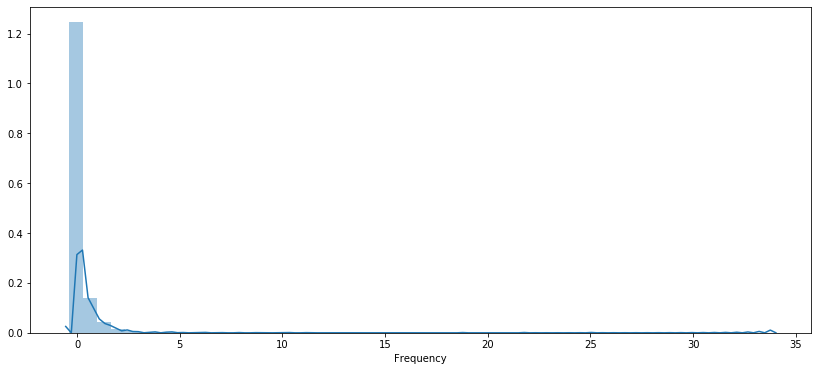

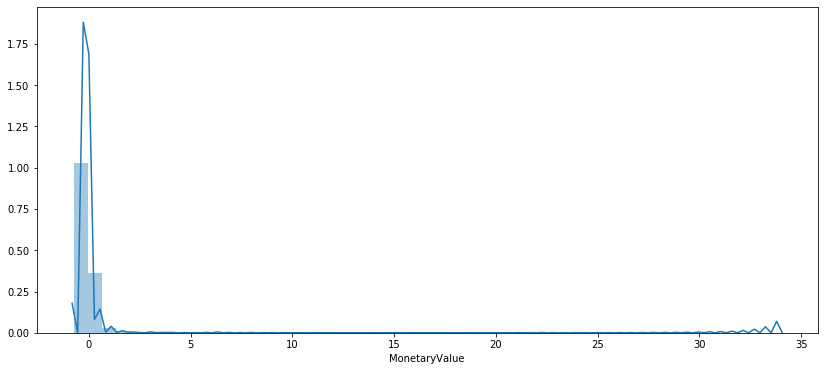

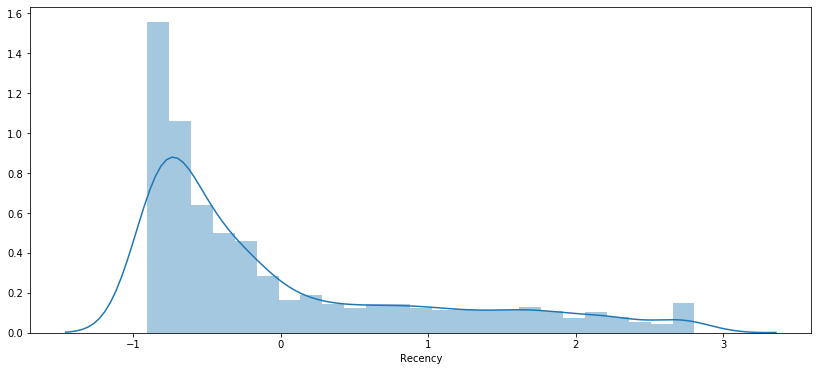

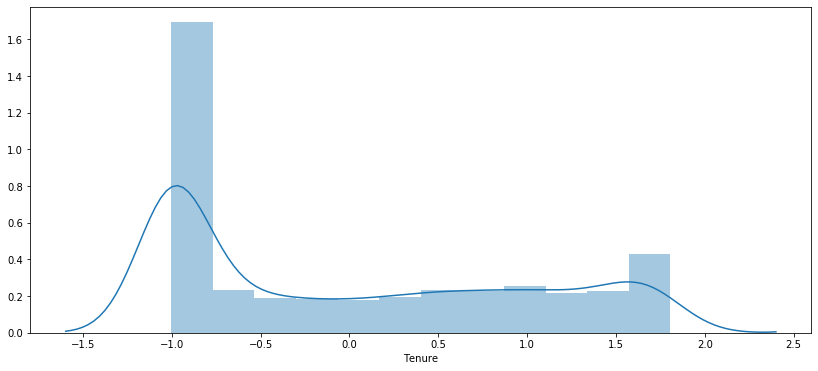

In [202]:
# look at the distribution of these standardized data

for i in RFMT_table_norm.columns.tolist():
    plt.figure(figsize=(14,6))
    sns.distplot(RFMT_table_norm[i])
    plt.show()

In [203]:
RFMT_table_norm.describe().round(2)

,Frequency,MonetaryValue,Recency,Tenure
count,4362.00,4362.00,4362.00,4362.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.40,-0.76,-0.90,-1.00
25%,-0.33,-0.20,-0.75,-1.00
50%,-0.22,-0.15,-0.42,-0.27
75%,0.04,-0.04,0.51,0.92
max,33.87,34.00,2.81,1.81


now we have same average values and standard deviation for each feature

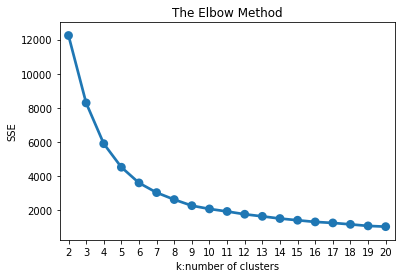

In [210]:
# applied elbow method to find the best K for k-means

from sklearn.cluster import KMeans

# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(RFMT_table_norm)
    sse[k] = kmeans.inertia_

# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k:number of clusters'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [233]:
# Choose k=8 and fit data set to k-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(RFMT_table_norm)

# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_

In [234]:
# add the cluster labels as new column to RFMT table
RFMT_final =  RFMT_table.assign(Cluster = cluster_labels)

# Group data set by k-means cluster
RFMT_final.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
}).round(0).reset_index()

Cluster Recency Frequency MonetaryValue Tenure      
             mean      mean          mean   mean count
0       0    13.0     517.0       12308.0  341.0   195
1       1   259.0      25.0         427.0   25.0  1002
2       2    12.0     997.0      189180.0  352.0     5
3       3    57.0      43.0         670.0   38.0  1550
4       4     5.0    5635.0       61964.0  304.0     4
5       5    40.0     107.0        1927.0  269.0  1606

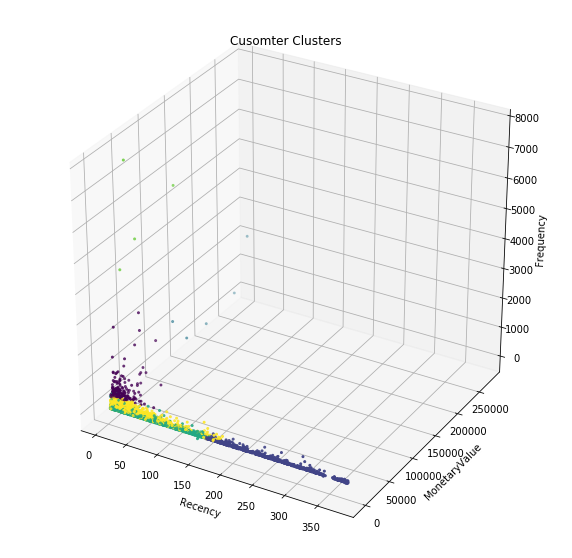

In [239]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(RFMT_final['Recency'])
y = np.array(RFMT_final['MonetaryValue'])
z = np.array(RFMT_final['Frequency'])

ax.scatter(x,y,z, c=RFMT_final["Cluster"],s=4)

plt.title('Cusomter Clusters')
ax.set_xlabel('Recency')
ax.set_ylabel('MonetaryValue')
ax.set_zlabel('Frequency')

plt.show()

# Cluster 0：have 195 customers with the high MonetaryValue and very recent, and the decent frequency, long tenure,  'good and loyal cusotmers' 

# Cluster 1：have 1002 customers with the lowest MonetaryValue and highest Recency mean, and the lowest frequency mean, shortest tenture, 'worst cusotmers'

# Cluster 2：have 5 customers with the highest MonetaryValue and second lowest Recency mean, and the second highest frequency mean, longest tenture, 'high value loyal customers'

# Cluster 3：have  1550 fairly new customers we need to work on 

# Cluster 4：have 4 high value customers who bought most frequent and most recent, long tenure, 'loyal and great potiential'

# Cluster 5：have 1606 customers with good tenure, decent freqency, fairly new, 'potential customers'

